Enter the number of pallets with dimensions 80 x 120 cm:  5
Enter the number of pallets with dimensions 100 x 120 cm:  7
Enter the bin width (in cm):  244
Enter the bin height (in cm):  1219


Could not place pallet ID 4. Not enough space.
4/5 Pallets 80 x 120 cm | 7/7 Pallets 100 x 120 cm


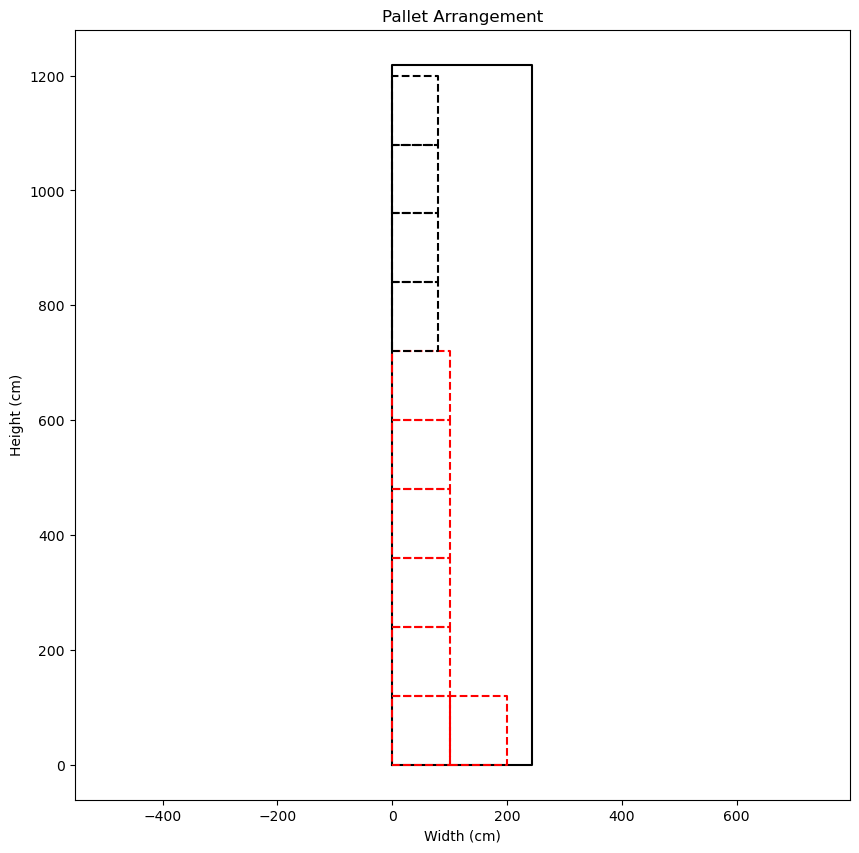

In [3]:
import matplotlib.pyplot as plt


def plot_solution(all_rects, bin_width, bin_height, pal_812, pal_1012):
   
    plt.figure(figsize=(10, 10))
    
   
    plt.plot(
        [0, bin_width, bin_width, 0, 0],
        [0, 0, bin_height, bin_height, 0],
        'k-'
    )
    
   
    for rect in all_rects:
        x, y, w, h, rid = rect
        x_coords = [x, x + w, x + w, x, x]
        y_coords = [y, y, y + h, y + h, y]
        
       
        if sorted([w, h]) == sorted(pal_812):
            color = '--k'  
        elif sorted([w, h]) == sorted(pal_1012):
            color = '--r'  
        else:
            color = '--g' 
        
        plt.plot(x_coords, y_coords, color)
    
    
    plt.title("Pallet Arrangement")
    plt.xlabel("Width (cm)")
    plt.ylabel("Height (cm)")
    plt.axis('equal')
    plt.show()


def solver_custom(n_812, n_1012, bin_width, bin_height):
    """
    Custom algorithm to solve the pallet packing problem using a first-fit approach.
    """
  
    pal_812 = [80, 120]  # 80 x 120 cm
    pal_1012 = [100, 120]  # 100 x 120 cm

    # Create a list of rectangles to pack
    rectangles = [{'w': 80, 'h': 120, 'id': i} for i in range(n_812)] + \
                 [{'w': 100, 'h': 120, 'id': n_812 + i} for i in range(n_1012)]
    
   
    rectangles.sort(key=lambda r: r['w'] * r['h'], reverse=True)
    
    packed_rects = []
    free_spaces = [{'x': 0, 'y': 0, 'w': bin_width, 'h': bin_height}]  # Initial free space

    for rect in rectangles:
        placed = False
        for space in free_spaces:
            # Check if rectangle fits without rotation
            if rect['w'] <= space['w'] and rect['h'] <= space['h']:
                x, y = space['x'], space['y']
                packed_rects.append((x, y, rect['w'], rect['h'], rect['id']))
                free_spaces.remove(space)
                
                # Update free spaces
                free_spaces.append({'x': x + rect['w'], 'y': y, 'w': space['w'] - rect['w'], 'h': rect['h']})
                free_spaces.append({'x': x, 'y': y + rect['h'], 'w': rect['w'], 'h': space['h'] - rect['h']})
                placed = True
                break
            
            # Check if rectangle fits with rotation
            elif rect['h'] <= space['w'] and rect['w'] <= space['h']:
                x, y = space['x'], space['y']
                packed_rects.append((x, y, rect['h'], rect['w'], rect['id']))
                free_spaces.remove(space)
                
                # Update free spaces
                free_spaces.append({'x': x + rect['h'], 'y': y, 'w': space['w'] - rect['h'], 'h': rect['w']})
                free_spaces.append({'x': x, 'y': y + rect['w'], 'w': rect['h'], 'h': space['h'] - rect['w']})
                placed = True
                break

        # If the rectangle could not be placed, print debug message
        if not placed:
            print(f"Could not place pallet ID {rect['id']}. Not enough space.")

    # Count packed pallets
    packed_812 = sum(1 for rect in packed_rects if sorted([rect[2], rect[3]]) == sorted(pal_812))
    packed_1012 = sum(1 for rect in packed_rects if sorted([rect[2], rect[3]]) == sorted(pal_1012))
    
    # Display results
    print(f"{packed_812}/{n_812} Pallets 80 x 120 cm | {packed_1012}/{n_1012} Pallets 100 x 120 cm")
    return packed_rects, pal_812, pal_1012


def user_input():
    """
    Function to collect user input for the number of pallets and bin dimensions.
    """
    n_812 = int(input("Enter the number of pallets with dimensions 80 x 120 cm: "))
    n_1012 = int(input("Enter the number of pallets with dimensions 100 x 120 cm: "))
    bin_width = int(input("Enter the bin width (in cm): "))
    bin_height = int(input("Enter the bin height (in cm): "))
    
    return n_812, n_1012, bin_width, bin_height


# Example of standard container sizes
# 20ft container: Width = 235 cm, Length = 590 cm
# 40ft container: Width = 244 cm, Length = 1219 cm

# Get user inputs
n_812, n_1012, bin_width, bin_height = user_input()

# Solve and visualize
all_rects, pal_812, pal_1012 = solver_custom(n_812, n_1012, bin_width, bin_height)
plot_solution(all_rects, bin_width, bin_height, pal_812, pal_1012)

